# Introduction to Machine Learning (CSL2010) - Group project

In [ ]:
''' ROUGH WORK

Introduction to Machine Learning (CSL2010)

To include in report :-

explained variance
n_components variability
train-test-split
different models
  -> SVM
  -> Random Forest
  -> Decision Trees
  -> KNN
  -> XGboost
gridsearchcv for hyperparameter tuning

'''

' ROUGH WORK\n\nIntroduction to Machine Learning (CSL2010)\n\nTo include in report :-\n\nexplained variance\nn_components variability\ntrain-test-split\ndifferent models\n  -> SVM\n  -> Random Forest\n  -> Decision Trees\n  -> KNN\n  -> XGboost\ngridsearchcv for hyperparameter tuning\n\n'

##Importing all modules, libraries and datasets

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [ ]:
# Importing the train dataset
train_dataset = pd.read_csv("train.csv")
X_train = train_dataset.drop(columns=['ID', 'class'])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)

y_train = train_dataset['class']
y_train = LabelEncoder().fit_transform(y_train)
y_train = pd.DataFrame(y_train)

# Concatenating X and y dataframes
new_train_df = pd.concat([X_train, y_train], axis=1)

In [ ]:
# Importing the test dataset
test_dataset = pd.read_csv("test.csv", header=None)

X_test = test_dataset.drop(columns = [test_dataset.columns[0], test_dataset.columns[451]], axis=1)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

y_test = test_dataset[451]
y_test = LabelEncoder().fit_transform(y_test)
y_test = pd.DataFrame(y_test)

# Concatenating X and y dataframes
new_test_df = pd.concat([X_test, y_test], axis=1)

##Exploratory data analysis

In [ ]:
# Count of each class in training set
classes = train_dataset["class"].value_counts()
print(f"Count of unique classes in training dataset:-")
print(classes)
print('--------------------------')

# Count of each class in testing set
classes = test_dataset[451].value_counts()
print(f"Count of unique classes in testing dataset:-")
print(classes)
print('--------------------------')

# shape of training and testing set
print(f"Shape of training set = {new_train_df.shape}")
print(f"Shape of testing set = {new_test_df.shape}")

Count of unique classes in training dataset:-
H    69
P    67
Name: class, dtype: int64
--------------------------
Count of unique classes in testing dataset:-
P    22
H    16
Name: 451, dtype: int64
--------------------------
Shape of training set = (136, 451)
Shape of testing set = (38, 451)


## Applying PCA and visualizing top PCs, cumulative & individual explained variance

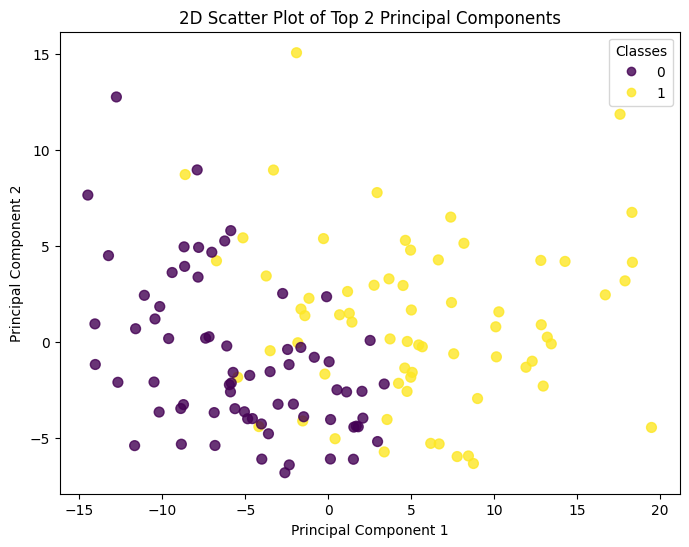

In [ ]:
# Visualizing top 2 PCs
X_train_for_visualisation_2 = X_train

pca_for_visualising_2 = PCA(n_components=2)
pca_for_visualising_2.fit(X_train_for_visualisation_2)
X_train_for_visualisation_2 = pca_for_visualising_2.transform(X_train_for_visualisation_2)

# Create a 2D scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot with different colors for each class
scatter = plt.scatter(X_train_for_visualisation_2[:, 0], X_train_for_visualisation_2[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.8)

# Add labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of Top 2 Principal Components')
plt.legend(*scatter.legend_elements(), title='Classes')

# Show the plot
plt.show()

In [ ]:
# Visualizing top 3 PCs
X_train_for_visualisation_3 = X_train
pca = PCA(n_components=3)
X_train_for_visualisation_3 = pca.fit_transform(X_train_for_visualisation_3)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each class
scatter = ax.scatter(X_train_for_visualisation_3[:, 0], X_train_for_visualisation_3[:, 1], X_train_for_visualisation_3[:, 2], c=y_train, cmap='viridis', s=50, alpha=0.8)

# Add labels and legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of Top 3 Principal Components')
ax.legend(*scatter.legend_elements(), title='Classes')

# Show the plot
plt.show()

In [ ]:
# Applying PCA
pca = PCA(n_components=0.8)
pca.fit(X_train)
print(pca.n_components_)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##Using SVM classifier and fine-tuning it

In [ ]:
# SVM classifier
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf', C = 10, gamma = 0.0001, random_state=42).fit(X_train, y_train.values.ravel())
svm_predictions = svm_model.predict(X_test)

# model accuracy for X_test
acctrain = svm_model.score(X_train, y_train)
accuracySVM = svm_model.score(X_test, y_test)
# f1_score_svm = f1_score(X_test, y_test)

print(f"training accuracy: {acctrain*100}%")
print(f"testing accuracy: {accuracySVM*100}%")
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(cm)

In [ ]:
# Searching for best parameters for SVM
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [1, 3, 10, 30, 100, 300, 1000],
              'gamma': [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}

grid = GridSearchCV(SVC(), param_grid, cv=5)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

In [ ]:
# Best SVM after fine-tuning

best_svm_model = SVC(kernel = 'rbf', C = 10, gamma = 0.0001, random_state=42).fit(X_train, y_train.values.ravel())
best_svm_predictions = svm_model.predict(X_test)

# model accuracy for X_test
best_acctrain = best_svm_model.score(X_train, y_train)
best_accuracySVM = best_svm_model.score(X_test, y_test)
# f1_score_svm = f1_score(X_test, y_test)

print(f"training accuracy: {best_acctrain*100}%")
print(f"testing accuracy: {best_accuracySVM*100}%")
print("\nClassification Report:\n", classification_report(y_test, best_svm_predictions))

## Using KNN for classification and fine tuning it

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)

param_grid = {'n_neighbors': np.arange(1, 20),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

In [ ]:
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                metric=best_params['metric'])
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN model is equal ' + str(round(accuracy, 2)*100) + ' %.')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of KNN model is equal 55.00000000000001 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.48      1.00      0.65        16
           1       1.00      0.23      0.37        22

    accuracy                           0.55        38
   macro avg       0.74      0.61      0.51        38
weighted avg       0.78      0.55      0.49        38



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Using Decision Trees

In [ ]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

dt_classifier = DecisionTreeClassifier(random_state=42)

# Define a grid of parameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform a grid search over the parameter grid
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the final Decision Tree model with the best parameters
final_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
final_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_dt_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Trees model is equal ' + str(round(accuracy, 2)*100) + ' %.')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Decision Trees model is equal 53.0 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.56      0.50        16
           1       0.61      0.50      0.55        22

    accuracy                           0.53        38
   macro avg       0.53      0.53      0.53        38
weighted avg       0.54      0.53      0.53        38



### Using Xtreme Gradient Boosting

In [ ]:
import xgboost
from xgboost import XGBClassifier

# Define the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Define a grid of parameters to search (including learning rate)
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1],  # Adjust this range based on your preferences
    'n_estimators': [100, 200, 300, 400],  # Adjust this range based on your preferences
    'max_depth': [3, 4, 5, 6,]
}

In [ ]:
# Perform a grid search over the parameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best learning rate
best_params = grid_search.best_params_
best_learning_rate = best_params['learning_rate']

print(best_learning_rate)
# Train the final XGBoost model with the best learning rate
final_xgb_model = XGBClassifier(**best_params)
final_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_xgb_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of XGB model is equal ' + str(round(accuracy, 2)*100) + ' %.')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

1
Accuracy of XGB model is equal 71.0 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.76      0.73      0.74        22

    accuracy                           0.71        38
   macro avg       0.70      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Apply Random Forest -------------------
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy of RandomForest:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 11, 12, 13, 14, 15, 16 ,17, 18, 19, 20]
}

<ipython-input-19-35c421451ec2>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Accuracy of RandomForest: 0.6578947368421053

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.81      0.67        16
           1       0.80      0.55      0.65        22

    accuracy                           0.66        38
   macro avg       0.68      0.68      0.66        38
weighted avg       0.70      0.66      0.66        38


Confusion Matrix:
 [[13  3]
 [10 12]]


In [20]:
# Perform a grid search over the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the final Decision Tree model with the best parameters
final_rf_model = RandomForestClassifier(**best_params, random_state=42)
final_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_rf_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random forest model is equal ' + str(round(accuracy, 2)*100) + ' %.')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Accuracy of Random forest model is equal 71.0 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.81      0.70        16
           1       0.82      0.64      0.72        22

    accuracy                           0.71        38
   macro avg       0.72      0.72      0.71        38
weighted avg       0.74      0.71      0.71        38



In [21]:
'''
We conclude that SVM performs the best on test set
hence we use SVM as the final classfication model for Alzheimer's detection
'''

"\nWe conclude that SVM performs the best on test set\nhence we use SVM as the final classfication model for Alzheimer's detection\n"